# Predicting Heart Disease Using Machine Learning

This is a notebook created to study machine learning and various data science tools available via Python to build a machine learning model that can predict the presence of heart disease (or abnormal heart conditions) in a given person based on specific features. The data set utilized is an open-source toy dataset from the <a href="https://archive.ics.uci.edu/ml/datasets/heart+disease">**UCI Machine Learning Repository**</a> for the purposes of learning, and this model is not being monetized.

The general workflow will be as follows:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation (Or tuning hyperparameters, adjusting graphs, etc.)


## 1. Problem Definition

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data (As featured in UCI Heart Disease Dataset)

> Features explained briefly below this block, however available in more deatail via https://archive.ics.uci.edu/ml/datasets/heart+disease

## 3. Evaluation

> As a proof of concept, this project is aiming for around 95% accuracy currently

## 4. Features

* age = age
* sex = sex (as defined in the 90s as reproductive organs)
* cp = chest pain type
> 4 Main types:
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic
* trestbps = resting blood pressure
* chol = serum cholesterol in mg/dl
> A person's serum cholesterol level represents the amount of total cholesterol in their blood
* fbs = fasting blood sugar > 120 mg/dl
>  A fasting blood sugar test measures sugar (glucose) in your blood.
* restecg = resting electrocardiographic results (values 0,1,2)
> Resting 12-lead electrocardiography (ECG) is a non-invasive test that can detect abnormalities including arrhythmias, evidence of coronary heart disease, left ventricular hypertrophy and bundle branch blocks. (-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria)
* thalach = maximum heart rate achieved
* exang = exercise induced angina
> Angina is a type of chestpain caused by reduced blood flow to the heart, it is a symptom of coronary artery disease.
* oldpeak = ST depression induced by exercise relative to rest
> ST depression is a term that refers to the position of the ST segment in a person’s ECG results. On an ECG machine, it is the depression in the wave/line segment. 
* slope = the slope of the peak exercise ST segment
> This represents the slope of the ST segment, represented as: -- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping
* ca = number of major vessels (0-3) colored by flourosopy
* thal = thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
* target = 0 for lack of heart disease, 1 for presence thereof

## Importing all the Tools

This project implements pandas, Matplotlib, and NumPy for our data analysis and manipulation

In [1]:
# Importing main data analysis (EDA or exploratory data analysis) tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Allows plots to appear within notebook
%matplotlib inline

# scikit-learn models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

## Loading the data

In [2]:
df = pd.read_csv("data/heart-disease.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Ordered as (rows, columns)
df.shape

(303, 14)

## Exploratory Data Analysis (EDA)

We want to understand the data and become an expert on the specific data

We want to keep in mind:

1. What questions are we trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it? (.isna.sum() to check)
4. Where are the outliers and why should you care about them?
5. How can you add, change, or remove features to get the most out of data

In [6]:
# Determining how many instances of disease, and how many instances of lack thereof
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: >

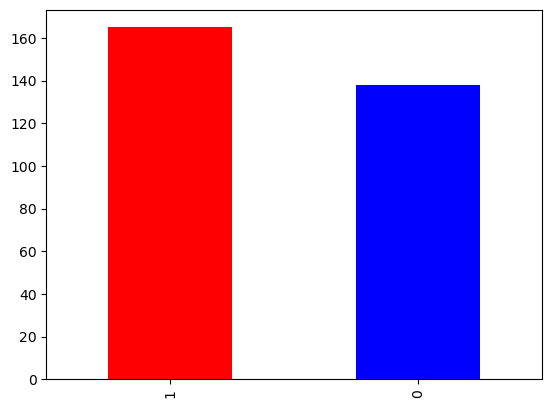

In [7]:
df["target"].value_counts().plot(kind="bar", color=["red", "blue"])

In [8]:
# Observing data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# Finding missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Pattern Analysis

**Heart Disease Frequency according to Sex**

In [11]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
# From the above, it becomes clear the dataset has more 1 (sex) men than women

In [13]:
# Comparing the target column to sex column
sex_to_target = pd.crosstab(df.target, df.sex)
sex_to_target

sex,0,1
target,,
0,24,114
1,72,93


In [14]:
# There are a couple of simple heuristics we can derive from the above, for example:
# Around 70% of women in the given sample has heart disease. Around 50% of men have heart disease likewise.

Text(0.5, 0, '0 = No Heart Disease, 1 = Disease')

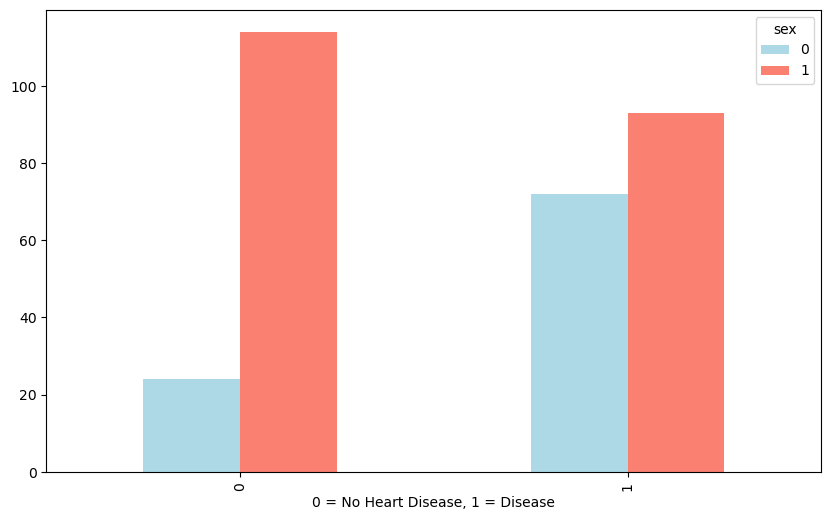

In [15]:
sex_to_target.plot(kind="bar",
                   figsize=(10,6),
                   color = ["lightblue", "salmon"]);

plt.xlabel("0 = No Heart Disease, 1 = Disease")

In [16]:
# Next we plan to look at age and thalach (maximum heart rate) against the target
# FUTURE REFERENCE: For Thalach, since there are 91 different types of values, a bar graph like above would
# not be a good choice to display the data, however another plotting method like a scatterplot would come in handy

**Age and Max Heart Rate for Heart Disease**

Text(0, 0.5, 'Max Heart Rate')

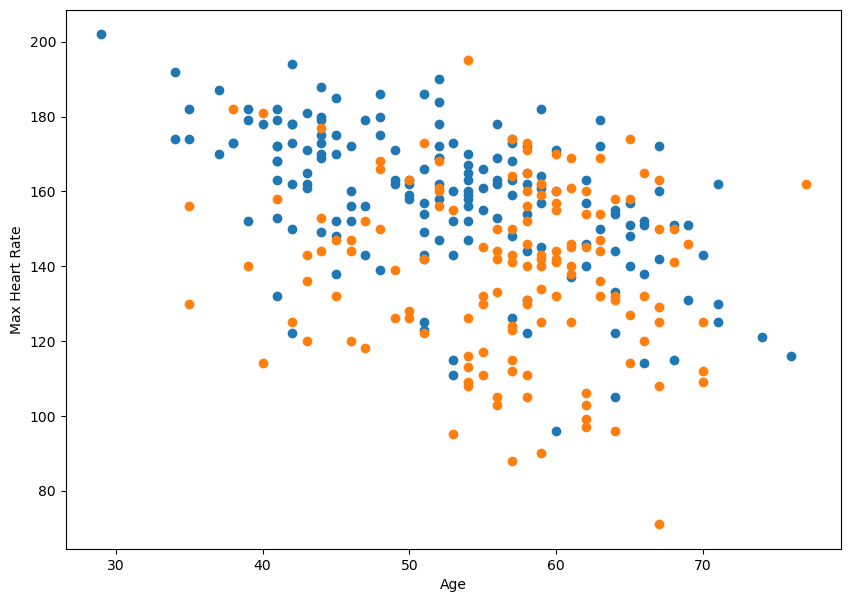

In [17]:
plt.figure(figsize=(10,7))

# This adds to the plot points wherein age and max heart rate appear for heart disease
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1]);

# This adds where age and max heart rate do not result in heart disease
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0]);

plt.xlabel("Age")
plt.ylabel("Max Heart Rate")

<Axes: ylabel='Frequency'>

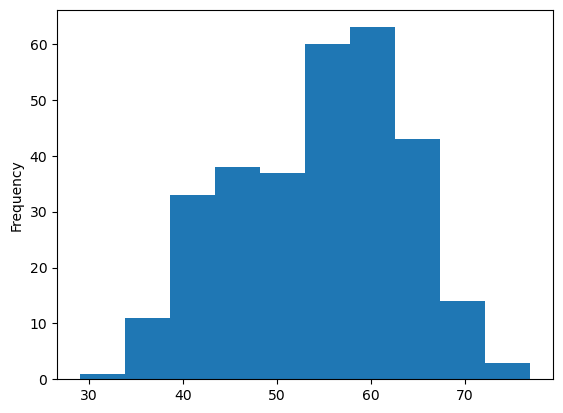

In [18]:
# Distribution of age of our samples
df.age.plot.hist()

In [19]:
# This shows a bell curve, wherein most of our samples are around the middle age of late 50s to late 60s

## Heart Disease Frequency per Chest Pain Type
* cp = chest pain type
> 4 Main types:
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain (non heart related)
-- Value 4: asymptomatic

In [20]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


Text(0.5, 0, 'Chest Pain Types')

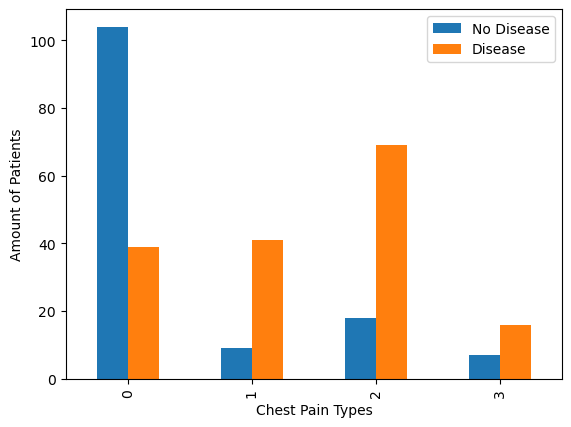

In [21]:
pd.crosstab(df.cp, df.target).plot(kind="bar")

plt.legend(["No Disease", "Disease"])
plt.ylabel("Amount of Patients")
plt.xlabel("Chest Pain Types")

## Building a Correlation Matrix

In [22]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


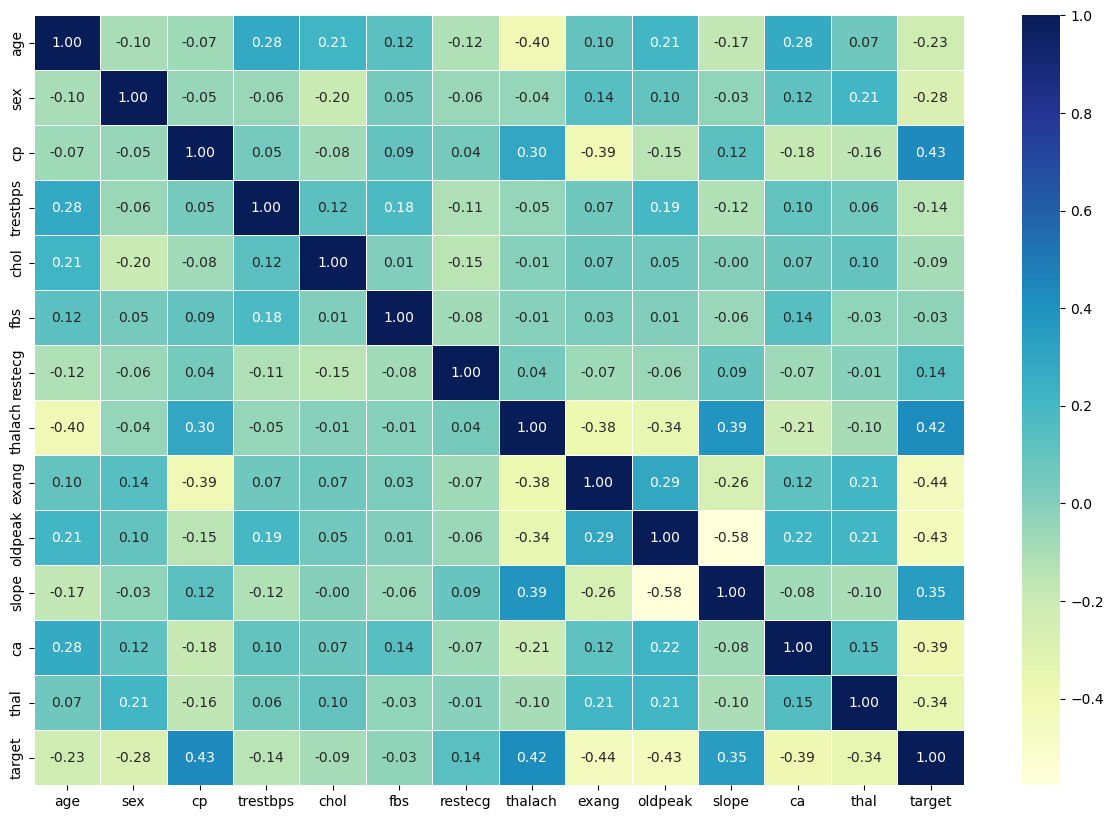

In [23]:
# Beautifying the correlation matrix
# The values displayed are R, or the correlation coefficient. The closer to 1, the more positive a correlation. The closer to -1, the more negative a correlation
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f", # two decimal places
                 cmap="YlGnBu"); # yellow, green, and blue

# 5. Modelling 

In [24]:
# Split the data into X and y for train and test sets

X = df.drop("target", axis=1)
y = df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Now with the data split and prepped to be trained on models, we will be looking to select the correct models for the problem. Since this is a classification problem, the <a href="https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html"> sklearn model map </a> suggests we try *k nearest neighbors, LogisticRegression, and RandomForestClassifier*

NOTE FOR FUTURE SELF: Why is LogisticRegression being used for classification? 

From <a href="https://paperswithcode.com/method/logistic-regression#:~:text=Logistic%20Regression%2C%20despite%20its%20name,or%20the%20log-linear%20classifier."> *Papers With Code* </a>: "Logistic Regression, despite its name, is a linear model for classification rather than regression. Logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function."

Finding good models to try is as simple as searching "Machine learning models for X problem (classification, regression, etc)"

In [25]:
# Model dictionary to be iterated over to store results

models = {'KNeighbors': KNeighborsClassifier(),
          'RandomForestClassifier': RandomForestClassifier(),
          'LogisticRegression': LogisticRegression()}

# Output dictionary to later store results
results = {}

# Creating a function to fit and score the models
def fit_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        results[model_name] = model.score(X_test, y_test)
    
    return results


In [26]:
model_scores = fit_score(models, X_train, X_test, y_train, y_test)
model_scores

C:\Users\comme\ML_Workflow\project_heart_disease\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNeighbors': 0.6229508196721312,
 'RandomForestClassifier': 0.7868852459016393,
 'LogisticRegression': 0.8852459016393442}

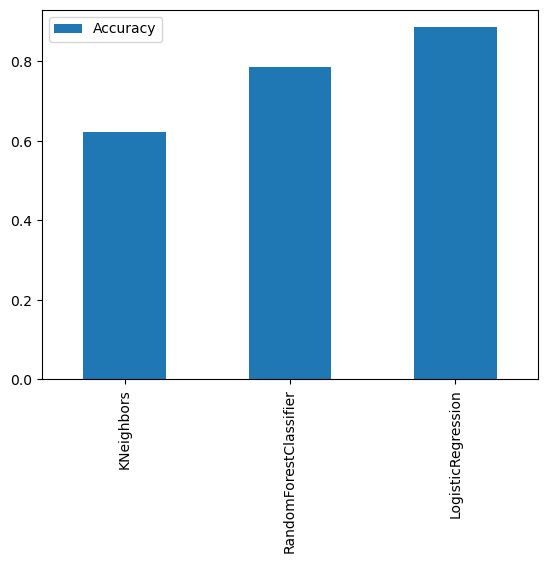

In [27]:
## Comparing the Models Visually
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
model_compare.T.plot.bar();

In [28]:
# We find that Logisitic Regression is so far the best performing model (scored with default metric of accuracy)

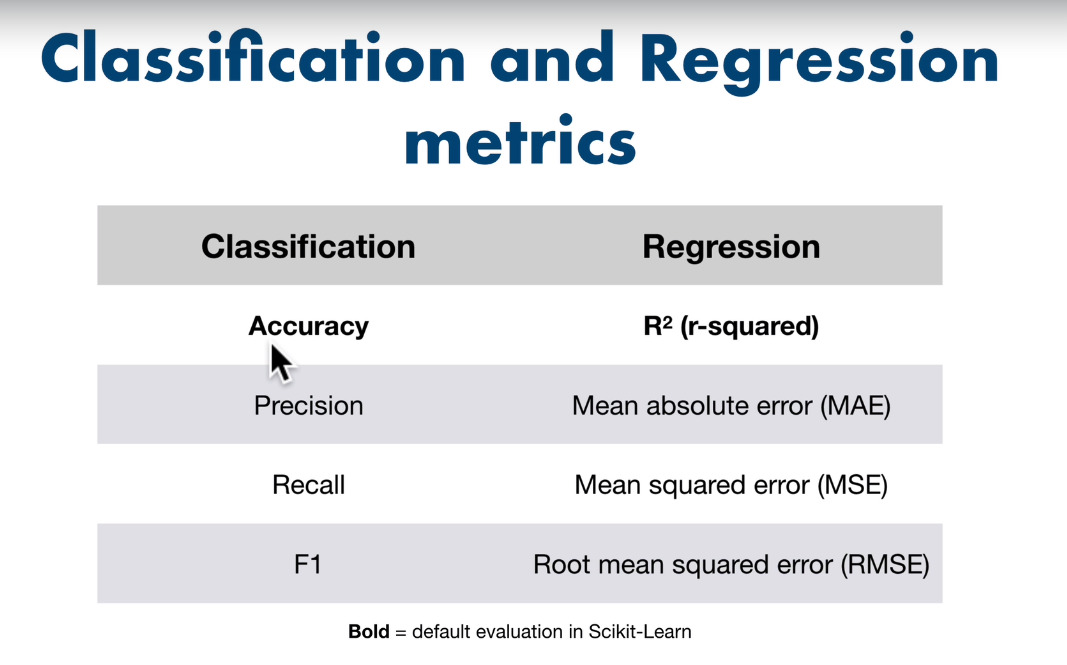

For reference (some) of the evaluations used for classification and regression estimators

After the creation of the baseline model, we need to:

1. Perform hyperparamter tuning
2. Find feature importance
3. Create a confusion matrix
4. Perform cross-validation (like GridSeearchCV or RandomizedCV)
5. Find precision, recall, and f1 scores
6. Classification report
7. ROC Curve and Area Under ROC Curve (AUC)



## Hyperparameter Tuning

In [29]:
# Testing tuning on our KNN model

# Creating empty lists to store scores to be later plotted on a graph
test_scores = []
train_scores = []

# instantiating the model
knn = KNeighborsClassifier()

# Creating range to later be used as x in plot
# Remember, ranges min value is inclusive, max value exclusive (n-1)
neighbors = range(1, 21)

# Creating a for loop to iterate over a range of different neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    
    test_scores.append(knn.score(X_test, y_test))
    
test_scores



[0.5737704918032787,
 0.5245901639344263,
 0.5573770491803278,
 0.5573770491803278,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6065573770491803,
 0.6721311475409836,
 0.6229508196721312,
 0.6721311475409836,
 0.6557377049180327,
 0.639344262295082,
 0.6229508196721312,
 0.6885245901639344,
 0.6721311475409836,
 0.6721311475409836,
 0.6557377049180327,
 0.6557377049180327,
 0.639344262295082]

In [30]:
train_scores

[1.0,
 0.8140495867768595,
 0.8099173553719008,
 0.768595041322314,
 0.7727272727272727,
 0.768595041322314,
 0.743801652892562,
 0.7603305785123967,
 0.7479338842975206,
 0.7231404958677686,
 0.7231404958677686,
 0.71900826446281,
 0.7148760330578512,
 0.7231404958677686,
 0.71900826446281,
 0.7066115702479339,
 0.7024793388429752,
 0.6983471074380165,
 0.6983471074380165,
 0.7066115702479339]

Max KNN Score on test data is 68.85%


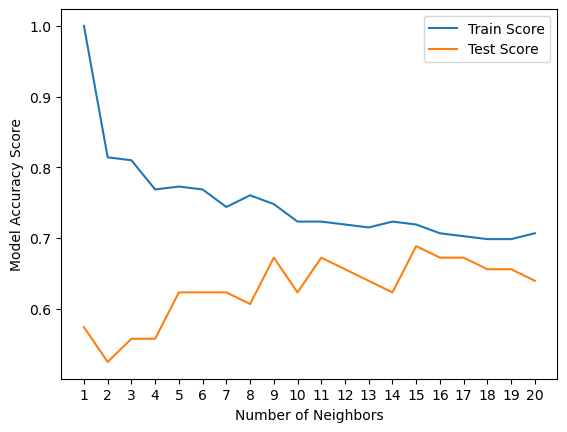

In [31]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Accuracy Score")
plt.legend()

print(f"Max KNN Score on test data is {max(test_scores) * 100:.2f}%")

In [32]:
# This solidifies KNN as an estimator/model we do not want to use

## Hyperparameter Tuning with RandomizedSearchCV

Specifically tuning LogisticRegression() and RandomizedForestClassifier()

In [33]:
# Creating a hyperparameter grid for logistic regression (again, just search how to tune logreg (or x model name)

lr_grid = {'solver': ["liblinear"], 
                'C': np.logspace(-4, 4, 20)}

# Creating a grid for randomforestclassifier
# utilizing np for range calc because it is faster than baked in py functions. range of 10 - 1000, step of 50
# like default python range, np.arange is inclusive of min exclusive of max (n-1)

rf_grid = {"n_estimators": np.arange(10, 1001, 50), 
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 21, 2),
           "min_samples_leaf": np.arange(1, 21, 2)}
           

**Tuning LogisticRegression**

In [34]:
np.random.seed(42)

# 5 fold cross validation (creates 5 different train test splits), n_iter = 20 different grid combos, verbose = outputting data

rs_lr = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=lr_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True) 

# Fitting the randomized search cv
rs_lr.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [35]:
# Checkinbg the best parameters
rs_lr.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [36]:
# Scoring
rs_lr.score(X_test, y_test)

0.8852459016393442

In [37]:
# This is unfortunately performing worse than log reg out of the box

**Now testing RandomForestClassifier**

In [38]:
# Setting Random Seed
np.random.seed(42)

# Setup RandomizedSearch for RandomForest
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# Fit the model
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [39]:
# Finding the best params
rs_rf.best_params_

{'n_estimators': 160,
 'min_samples_split': 2,
 'min_samples_leaf': 17,
 'max_depth': 10}

In [40]:
rs_rf.score(X_test, y_test)

0.8360655737704918

This is performing much better than the original model, however default logistic regression is still doing better

Thus we will continue working with logistic regression using gridsearchcv(which is exhaustive, like a brute force)

## Hyperparamter tuning with GridSearchCV

In [41]:
# Creating a grid of different hyperparamters for LogReg

lr_grid = {'solver': ["liblinear"], 
                'C': np.logspace(-4, 4, 30)
          }

# Setting up the grid search
gs_lr = GridSearchCV(LogisticRegression(),
                    param_grid=lr_grid,
                    verbose=True,
                     cv=5)

# Fitting the model
gs_lr.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [42]:
# Checking best params
gs_lr.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [43]:
# Evaluation
gs_lr.score(X_test, y_test)

0.8852459016393442

In [44]:
# Unfortunately, this is also far worse than baseline
# Baseline below double checked
lr_base = LogisticRegression()
lr_base.fit (X_train, y_train)
lr_base.score(X_test, y_test)

C:\Users\comme\ML_Workflow\project_heart_disease\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8852459016393442

In [45]:
# Baseline model score now currently around 90.16% accuracy

## Evaluation of classifier model beyond base accuracy score

* ROC curve and AUC Score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1-Score
* Cross-Validation interspersed when possible

In [46]:
# Making predictions:
y_preds_tuned = gs_lr.predict(X_test)
y_preds_base = lr_base.predict(X_test)

In [47]:
# ROC Curve (Comparison of True Positive Rate vs False Positive Rate)
# True positive = model predicts 1 when truth is 1, true negative = model 0 when 0, and so forth for false

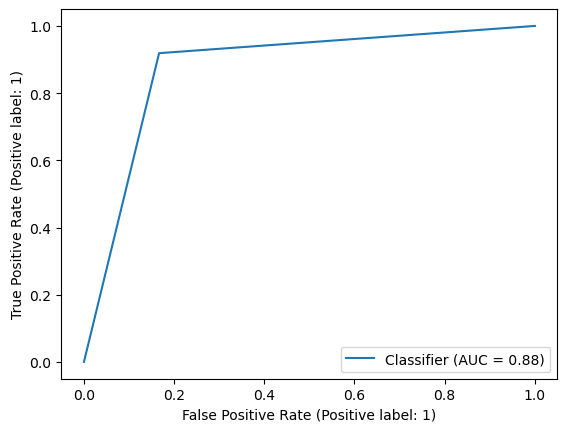

In [48]:
# Plotting the roc curve and calculating auc
TuneRoc = RocCurveDisplay.from_predictions(y_true = y_test, 
                                y_pred=y_preds_tuned)
TuneRoc

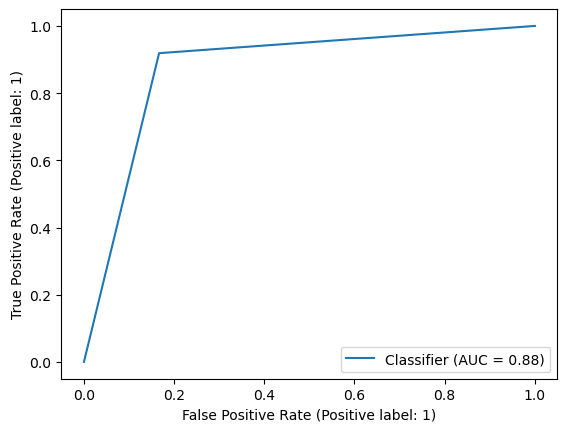

In [49]:
BaseRoc = RocCurveDisplay.from_predictions(y_true = y_test,
                                           y_pred = y_preds_base)

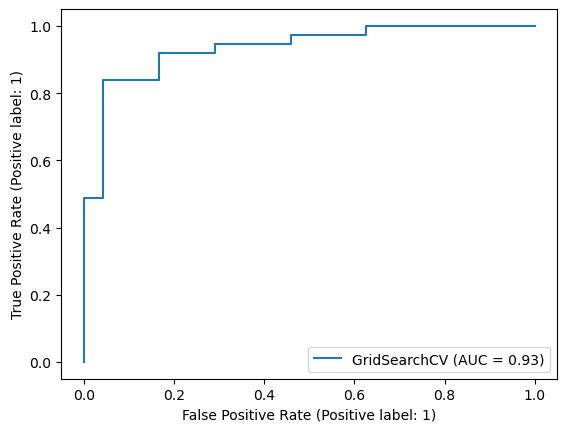

In [50]:
# We may also plot a roc curve directly from estimator (Preferrable method)
RocCurveDisplay.from_estimator(gs_lr, X_test, y_test)

In [51]:
# Confusion Matrix
Tuned_Matrix = confusion_matrix(y_test, y_preds_tuned)
Tuned_Matrix

array([[20,  4],
       [ 3, 34]], dtype=int64)

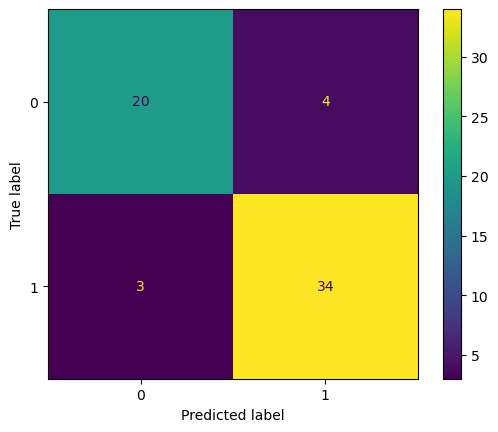

In [52]:
# Prettier confusion matrix a la built in sklearn function :)
ConfusionMatrixDisplay.from_estimator(gs_lr, X_test,
                                     y_test)

In [53]:
# Add a classifcation report
# We use the print function because otherwise the classification report comes out un-structured
print(classification_report(y_true = y_test,
                           y_pred = y_preds_tuned))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        24
           1       0.89      0.92      0.91        37

    accuracy                           0.89        61
   macro avg       0.88      0.88      0.88        61
weighted avg       0.88      0.89      0.88        61



**Refresher on the above metrics**

> Why use the below two metrics? Issues of accuracy. If I had unbalanced classes, such as 990 oranges and 10 apples, and created a model that just labels everything oranges, that model still has a 99% accuracy but isn't a very good model. Enter precision and recall.

> Precision: Indicates the proportion of true positive identifications. A model with no false positives has a precision of 1.0. Precision thus focuses on one type of classification, say apples, and asks for the total of true positives over the total positive observations. **So precision focuses in on all given 1 labels in a predicted set**

> Recall: The proportion of actual positives that are correctly classified. No false negatives = recall of 1.0. Recall thus focuses not on the total positive observations like precision, but instead how many actual 'apples' exist in the data set. Thus total apples correct / over total actual apples. **Recall focuses on all actual 1 labels via test set vs predicted set**

> F1-Score: The f1 score is a combination of precision and recall. If precision and recall were both 1.0, so too would F1

**Further Metrics**
> Support: The number of samples each metric was calculated upon

> Macro Avg: Average precision, recall, and f1-score between classes. Does not take class imbalance into account

> Weighted Avg: Weighted of the above, each metric is thus calculated with respect to each class and does take imbalance into account

### Creation of a classification report utilizing cross-validation:

Specifically calculating precision, recall, and f1-score with cross-validation with cross_val_score

In [54]:
# Checking for best hyperparameters
gs_lr.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [55]:
# Creating a classifier with best params
clf = LogisticRegression(C= 2.592943797404667, solver= 'liblinear')

In [56]:
# Cross-validated accuracy
# We are using all the X and all the y data since it is splitting it up for us in cross val over 5 setsb
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.81967213, 0.86885246, 0.85245902, 0.86666667, 0.71666667])

In [57]:
# We then take the mean of each score it has returned for each iteration of test and train set
# This will be our average accuracy across the splits
# Using numpy function because it is faster than base python
cv_acc_mean = np.mean(cv_acc)
cv_acc_mean

0.8248633879781421

In [58]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                               X,
                               y,
                               cv=5,
                               scoring="precision"
                              )
cv_precision

array([0.78947368, 0.90322581, 0.85294118, 0.83783784, 0.71052632])

In [59]:
cvp_mean = np.mean(cv_precision)
cvp_mean

0.8188009641520078

In [60]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                            X,
                            y,
                            cv=5,
                            scoring="recall"
                           )

cv_recall

array([0.90909091, 0.84848485, 0.87878788, 0.93939394, 0.81818182])

In [61]:
cvr_mean = np.mean(cv_recall)
cvr_mean

0.8787878787878787

In [62]:
# Cross-validated f1_score

In [63]:
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="f1"
                       )

cv_f1

array([0.84507042, 0.875     , 0.86567164, 0.88571429, 0.76056338])

In [64]:
cvf1_mean = np.mean(cv_f1)
cvf1_mean

0.8464039460644465

<Axes: title={'center': 'Cross Validated Classification Metrics'}>

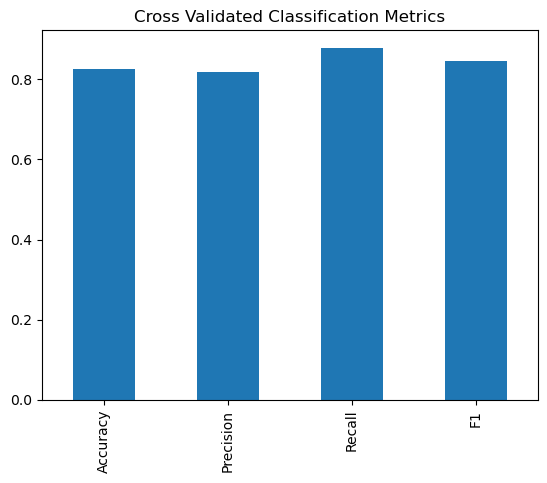

In [65]:
# Storing these scores into a visualization
cv_metrics = pd.DataFrame({"Accuracy": cv_acc_mean,
                           "Precision": cvp_mean,
                           "Recall": cvr_mean,
                           "F1": cvf1_mean},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross Validated Classification Metrics", legend = False)

## Feature Importance

Feature importance is a way of asking ourselves, "which features contributed the most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One means of finding feature importance is simply searching "MODEL NAME feature importance."

In [66]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [67]:
clf.fit(X_train, y_train)

LogisticRegression(C=2.592943797404667, solver='liblinear')

In [68]:
# Check coef_ (Important to locating feature importance in LogRegress model)
clf.coef_

array([[ 0.00605236, -1.45699172,  0.78749276, -0.0171702 , -0.00270551,
         0.08897335,  0.31774397,  0.03002133, -0.82091883, -0.65637345,
         0.37124159, -0.55686299, -0.646534  ]])

In [69]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.006052362879374252,
 'sex': -1.4569917162067665,
 'cp': 0.7874927577948265,
 'trestbps': -0.017170198354263342,
 'chol': -0.0027055056161775634,
 'fbs': 0.08897335365223523,
 'restecg': 0.31774396665454685,
 'thalach': 0.030021331063556818,
 'exang': -0.8209188296019684,
 'oldpeak': -0.6563734517999329,
 'slope': 0.37124159285052544,
 'ca': -0.5568629859355448,
 'thal': -0.6465340034429439}

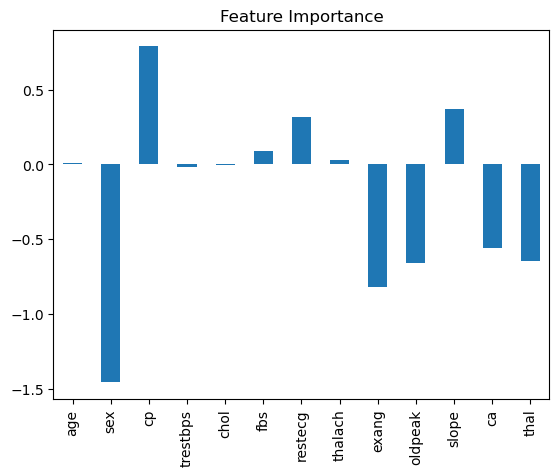

In [70]:
# Visualize feaature importance
feature_df = pd.DataFrame (feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

This graph above essentially displays how much each feature contributes to determining our target variable. The negative numbers = a negative correlation, and the inverse a positive.  Features with low importance can be ignored for future data collection, and allow us to focus our efforts

## 6. Finalizing Experimentation

IF we haven't hit the evaluation metric yet, should we:

* Collect more data?
* Try a different or better model? Such as XGBoost or CatBost
* Could we improve the current model?

And, if we did finish the model, how can we export it?

*PKL or  joblib

In [73]:
from joblib import dump

dump(lr_base, filename = "heart_disease_classification_model")

['heart_disease_classification_model']